In [1]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler
model = torch.hub.load('pytorch/vision:v0.10.0', 'googlenet', pretrained=False)
model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/torchvision/models/googlenet.py:47: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [2]:
!wget http://www.zemris.fer.hr/~kalfa/Datasets/rMASTIF/rmastif_train.tar.gz
!wget http://www.zemris.fer.hr/~kalfa/Datasets/rMASTIF/rmastif_test.tar.gz


--2022-11-30 22:42:49--  http://www.zemris.fer.hr/~kalfa/Datasets/rMASTIF/rmastif_train.tar.gz
Resolving www.zemris.fer.hr (www.zemris.fer.hr)... 31.147.204.179
Connecting to www.zemris.fer.hr (www.zemris.fer.hr)|31.147.204.179|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46907822 (45M) [application/x-gzip]
Saving to: ‘rmastif_train.tar.gz’

rmastif_train.tar.g 100%[===================>]  44.73M  14.0MB/s    in 3.2s    

2022-11-30 22:42:53 (14.0 MB/s) - ‘rmastif_train.tar.gz’ saved [46907822/46907822]

--2022-11-30 22:42:54--  http://www.zemris.fer.hr/~kalfa/Datasets/rMASTIF/rmastif_test.tar.gz
Resolving www.zemris.fer.hr (www.zemris.fer.hr)... 31.147.204.179
Connecting to www.zemris.fer.hr (www.zemris.fer.hr)|31.147.204.179|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21169167 (20M) [application/x-gzip]
Saving to: ‘rmastif_test.tar.gz’

rmastif_test.tar.gz 100%[===================>]  20.19M  10.0MB/s    in 2.0s    

2022-11-30 2

In [3]:
!mkdir Training
!mkdir Testing

In [4]:

!tar -xvf /content/rmastif_test.tar.gz -C /content/Testing
!tar -xvf /content/rmastif_train.tar.gz -C /content/Training

Streaming output truncated to the last 5000 lines.
00015/00021_00000.ppm
00015/00000_00003.ppm
00015/00031_00001.ppm
00015/00015_00001.ppm
00015/00028_00003.ppm
00015/00004_00003.ppm
00015/00014_00003.ppm
00015/00011_00001.ppm
00015/00012_00001.ppm
00015/00031_00002.ppm
00015/00026_00002.ppm
00015/00029_00002.ppm
00015/00007_00003.ppm
00015/00016_00001.ppm
00015/00019_00003.ppm
00015/00000_00000.ppm
00015/00005_00002.ppm
00015/00002_00000.ppm
00015/00003_00002.ppm
00015/00003_00001.ppm
00015/00009_00000.ppm
00015/00018_00000.ppm
00015/00031_00000.ppm
00015/00013_00000.ppm
00015/00015_00002.ppm
00015/00006_00003.ppm
00015/00021_00001.ppm
00015/00020_00003.ppm
00015/00006_00001.ppm
00015/00014_00002.ppm
00015/00025_00001.ppm
00015/00000_00002.ppm
00016/
00016/00016_00000.ppm
00016/00025_00003.ppm
00016/00004_00000.ppm
00016/00006_00000.ppm
00016/00029_00001.ppm
00016/00005_00001.ppm
00016/00014_00000.ppm
00016/00029_00003.ppm
00016/00002_00002.ppm
00016/00008_00003.ppm
00016/00023_00000.

In [5]:
import torchvision
test_path = '/content/Testing'
train_path = '/content/Training'

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomAutocontrast(),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


#data = torchvision.datasets.ImageFolder(root=train_path, transform=preprocess)

#train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True,  num_workers=0)



train_data = torchvision.datasets.ImageFolder(root=train_path,transform=preprocess)
train_dataLoader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True,  num_workers=2)
print('Train',len(train_data))

test_data = torchvision.datasets.ImageFolder(root=test_path,transform=preprocess)
#print('TEST',len(test_dataset))
print('TEST',len(test_data))
#test_dataLoader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True,  num_workers=0)
test_dataLoader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True,  num_workers=2)


Train 4044
TEST 1784


In [6]:
num_classes = 31
num_epochs = 50
batch_size = 32
learning_rate = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
if torch.cuda.is_available():
    model.cuda()

cuda


In [7]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=5)

In [8]:
import time
start_time = time.time()
total_step = len(train_dataLoader)
accuracy_list = []

steps_list = []
train_loss = []
train_accuracy = []
train_loss = []
model.train()

for epoch in range(num_epochs):
  for i, data in enumerate(train_dataLoader):
    images, labels = data[0].to(device), data[1].to(device)

    #Forward Pass
    outputs = model(images).logits
    loss = criterion(outputs, labels)

    #Backpropogation and Optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #Train Accuracy
    total = labels.size(0)
    _, predicted = torch.max(outputs.data,1)

    correct = (predicted == labels).sum().item()
    
    steps = i + 1
    if steps%100==0 :
      accuracy = (correct / total) * 100
      accuracy_list.append(accuracy)
      steps_list.append(steps)
      train_loss.append(loss.item())
      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
            .format(epoch + 1, num_epochs, steps, total_step, loss.item(),
            accuracy))
    scheduler.step()
    
    

print("######## Training Finished in {} seconds ###########".format(time.time()-start_time))
print("Accuracy List: ",accuracy_list, "Steps List: ",steps_list)

Epoch [1/50], Step [100/127], Loss: 2.4621, Accuracy: 31.25%
Epoch [2/50], Step [100/127], Loss: 2.3351, Accuracy: 28.12%
Epoch [3/50], Step [100/127], Loss: 1.9400, Accuracy: 34.38%
Epoch [4/50], Step [100/127], Loss: 1.4128, Accuracy: 59.38%
Epoch [5/50], Step [100/127], Loss: 1.1745, Accuracy: 53.12%
Epoch [6/50], Step [100/127], Loss: 1.0331, Accuracy: 59.38%
Epoch [7/50], Step [100/127], Loss: 0.7196, Accuracy: 75.00%
Epoch [8/50], Step [100/127], Loss: 0.4746, Accuracy: 81.25%
Epoch [9/50], Step [100/127], Loss: 0.4123, Accuracy: 84.38%
Epoch [10/50], Step [100/127], Loss: 0.3781, Accuracy: 81.25%
Epoch [11/50], Step [100/127], Loss: 0.6060, Accuracy: 78.12%
Epoch [12/50], Step [100/127], Loss: 0.2061, Accuracy: 93.75%
Epoch [13/50], Step [100/127], Loss: 0.4330, Accuracy: 87.50%
Epoch [14/50], Step [100/127], Loss: 0.1316, Accuracy: 96.88%
Epoch [15/50], Step [100/127], Loss: 0.2756, Accuracy: 87.50%
Epoch [16/50], Step [100/127], Loss: 0.1523, Accuracy: 96.88%
Epoch [17/50], St

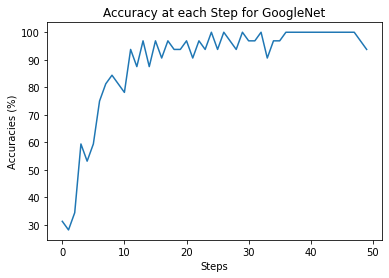

In [9]:
import matplotlib.pyplot as pyplot
import numpy as np

y_axis = np.array(accuracy_list)

pyplot.title("Accuracy at each Step for GoogleNet")
pyplot.xlabel("Steps")
pyplot.ylabel("Accuracies (%)")
pyplot.plot(y_axis)

pyplot.show()

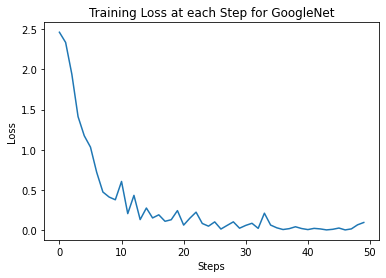

In [10]:
import matplotlib.pyplot as pyplot
import numpy as np

y_axis = np.array(train_loss)

pyplot.title("Training Loss at each Step for GoogleNet")
pyplot.xlabel("Steps")
pyplot.ylabel("Loss")
pyplot.plot(y_axis)

pyplot.show()

In [11]:
from torch.autograd import Variable
train_loss = []
train_accuracy = []
valid_loss = []
valid_accuracy = []
import torch.nn.functional as F

def evaluate(data_loader):
    model.eval()
    loss = 0
    correct = 0
    total = 0
    for data, target in data_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        if torch.cuda.is_available():
            data = data.cuda()
            target = target.cuda()
        
        output = model(data)
        loss += F.cross_entropy(output, target, size_average=False).item()
        pred = torch.max(output.data, 1)[1]
        total += len(data)
        correct += (pred == target).sum()
    loss /= len(data_loader.dataset)
    valid_loss.append(loss)    
    valid_accuracy.append(100 * correct / total)
    print('\nAverage Validation loss: {:.5f}\tAccuracy: {} %'.format(loss, 100 * correct / total))

evaluate(test_dataLoader)

<ipython-input-11-c9f6342292ec>:14: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.8/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Average Validation loss: 0.20867	Accuracy: 94.89910888671875 %


In [13]:
PATH = '/content/GoogleNet_rMASTif.pt'
torch.save(model.state_dict(), PATH)